<a href="https://colab.research.google.com/github/rugadamanikanta/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.


# **Variables**
Each attribute is a potential risk factor. There are both demographic behavioral, and medical risk factors.


# **Data Description**
Demographic:


*   Sex: male or female("M" or "F")
*   Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
*   Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
*   BP Meds: whether or not the patient was on blood pressure medication (Nominal)
*   Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
*   Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
*   Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
*   Tot Chol: total cholesterol level (Continuous)
*   Sys BP: systolic blood pressure (Continuous)
*   Dia BP: diastolic blood pressure (Continuous)
*   BMI: Body Mass Index (Continuous)
*   Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
*   Glucose: glucose level (Continuous)
Predict variable (desired target)
*   **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**





In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
df=pd.read_csv('/content/drive/MyDrive/alma better/capston/ML Capstone Project (C)/data_cardiovascular_risk.csv')

In [51]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [52]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [53]:
df.shape

(3390, 17)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [55]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390,NaN,NaN,NaN,1694.5,978.753,0,847.25,1694.5,2541.75,3389
age,3390,NaN,NaN,NaN,49.5422,8.59288,32,42,49,56,70
education,3303,NaN,NaN,NaN,1.97094,1.01908,1,1,2,3,4
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368,NaN,NaN,NaN,9.06948,11.8791,0,0,0,20,70
BPMeds,3346,NaN,NaN,NaN,0.0298864,0.170299,0,0,0,0,1
prevalentStroke,3390,NaN,NaN,NaN,0.00648968,0.0803085,0,0,0,0,1
prevalentHyp,3390,NaN,NaN,NaN,0.315339,0.464719,0,0,0,1,1
diabetes,3390,NaN,NaN,NaN,0.0256637,0.158153,0,0,0,0,1


Checking For duplication of Data.

In [56]:
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


**Handling Missing Values**

Checking for Missing Values

In [57]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [58]:
# Before Altering the Data copying orinal data
df_copy=df.copy()

**Hear total Missing data was less than 13% insted of delecting data we replacing missing values with approxmate values**

In [59]:
# Missing Value Count Function
def show_missing():
    missing = df_copy.columns[df_copy.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df_copy[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df_copy[show_missing()].isnull().sum().sort_values(ascending = False)/len(df_copy)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


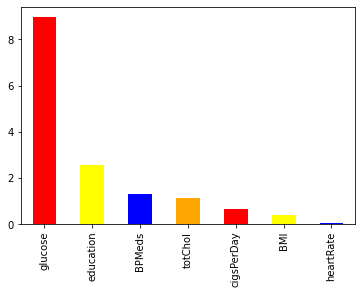

In [60]:
round(df_copy[show_missing()].isnull().sum().sort_values(ascending = False)/len(df_copy)*100,2).plot(kind='bar', color=['red', 'yellow', 'blue', 'orange'])

**Glucose**

In the following column mean and median are nearby. we have fill the missing values so i am using median values for filling the missing values.

In [61]:
df['glucose'].describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [62]:
print('Glucose Feature Missing Before')
print(df_copy[['glucose']].isnull().sum())
print('--'*50)
df_copy['glucose']=df_copy['glucose'].fillna(df['glucose'].median())
print('Glucose Feature Missing After')
print(df_copy[['glucose']].isnull().sum())
print('--'*50)

Glucose Feature Missing Before
glucose    304
dtype: int64
----------------------------------------------------------------------------------------------------
Glucose Feature Missing After
glucose    0
dtype: int64
----------------------------------------------------------------------------------------------------


**Education**

In [63]:
df['education'].describe()

count    3303.000000
mean        1.970936
std         1.019081
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [64]:
df['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

Education feature is not a continues variable so we using Mode for filling the missing values.

In [65]:
print('Education Feature Missing Before')
print(df_copy[['education']].isnull().sum())
print('--'*50)
df_copy['education']=df_copy['education'].fillna(df['education'].mode()[0])
print('Education Feature Missing After')
print(df_copy[['education']].isnull().sum())
print('--'*50)

Education Feature Missing Before
education    87
dtype: int64
----------------------------------------------------------------------------------------------------
Education Feature Missing After
education    0
dtype: int64
----------------------------------------------------------------------------------------------------


#BPMeds

In [66]:
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [67]:
df['BPMeds'].unique()

array([ 0., nan,  1.])

In [68]:
print('BPMeds Feature Missing Before')
print(df_copy[['BPMeds']].isnull().sum())
print('--'*50)
df_copy['BPMeds']=df_copy['BPMeds'].fillna(df['BPMeds'].mode()[0])
print('BPMeds Feature Missing After')
print(df_copy[['BPMeds']].isnull().sum())
print('--'*50)

BPMeds Feature Missing Before
BPMeds    44
dtype: int64
----------------------------------------------------------------------------------------------------
BPMeds Feature Missing After
BPMeds    0
dtype: int64
----------------------------------------------------------------------------------------------------


Total Cholostral

In [69]:
df['totChol'].describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [70]:
print('Total colostrol Feature Missing Before')
print(df_copy[['totChol']].isnull().sum())
print('--'*50)
df_copy['totChol']=df_copy['totChol'].fillna(df['totChol'].median())
print('Total colostrol Feature Missing After')
print(df_copy[['totChol']].isnull().sum())
print('--'*50)

Total colostrol Feature Missing Before
totChol    38
dtype: int64
----------------------------------------------------------------------------------------------------
Total colostrol Feature Missing After
totChol    0
dtype: int64
----------------------------------------------------------------------------------------------------


# Cigrates per Day

In [71]:
df['cigsPerDay'].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [72]:
print('Cigars per day Feature Missing Before')
print(df_copy[['cigsPerDay']].isnull().sum())
print('--'*50)
df_copy['cigsPerDay']=df_copy['cigsPerDay'].fillna(df['cigsPerDay'].median())
print('Cigars per day Feature Missing After')
print(df_copy[['cigsPerDay']].isnull().sum())
print('--'*50)

Cigars per day Feature Missing Before
cigsPerDay    22
dtype: int64
----------------------------------------------------------------------------------------------------
Cigars per day Feature Missing After
cigsPerDay    0
dtype: int64
----------------------------------------------------------------------------------------------------


# Body Mass Index(BMI)

In [73]:
df['BMI'].describe()

count    3376.000000
mean       25.794964
std         4.115449
min        15.960000
25%        23.020000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [74]:
print('BMI Feature Missing Before')
print(df_copy[['BMI']].isnull().sum())
print('--'*50)
df_copy['BMI']=df_copy['BMI'].fillna(df['BMI'].median())
print('BMI Feature Missing After')
print(df_copy[['BMI']].isnull().sum())
print('--'*50)

BMI Feature Missing Before
BMI    14
dtype: int64
----------------------------------------------------------------------------------------------------
BMI Feature Missing After
BMI    0
dtype: int64
----------------------------------------------------------------------------------------------------


Heart Rate

In [75]:
df['heartRate'].describe()

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [76]:
print('Heart Rate Feature Missing Before')
print(df_copy[['heartRate']].isnull().sum())
print('--'*50)
df_copy['heartRate']=df_copy['heartRate'].fillna(df['heartRate'].median())
print('Heart Rate Feature Missing After')
print(df_copy[['heartRate']].isnull().sum())
print('--'*50)

Heart Rate Feature Missing Before
heartRate    1
dtype: int64
----------------------------------------------------------------------------------------------------
Heart Rate Feature Missing After
heartRate    0
dtype: int64
----------------------------------------------------------------------------------------------------


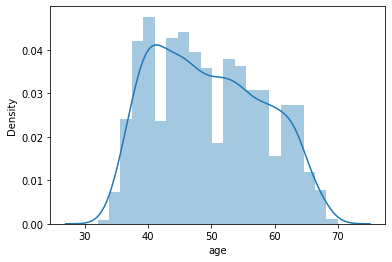

In [77]:
sns.distplot(df_copy.age)

Text(0, 0.5, 'Counts')

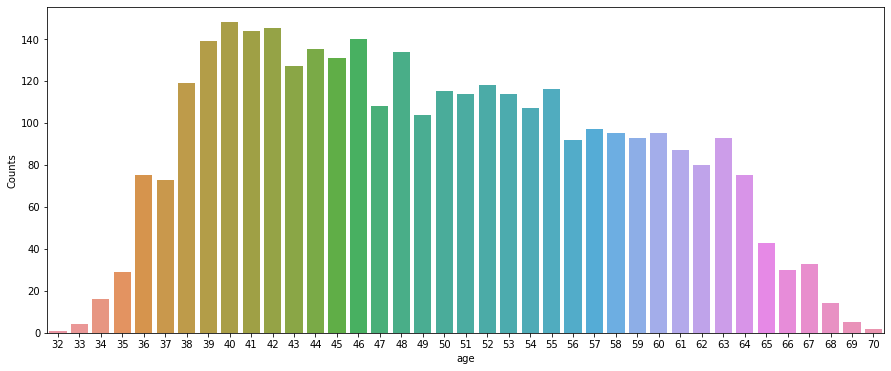

In [78]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(df.groupby(['age'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')

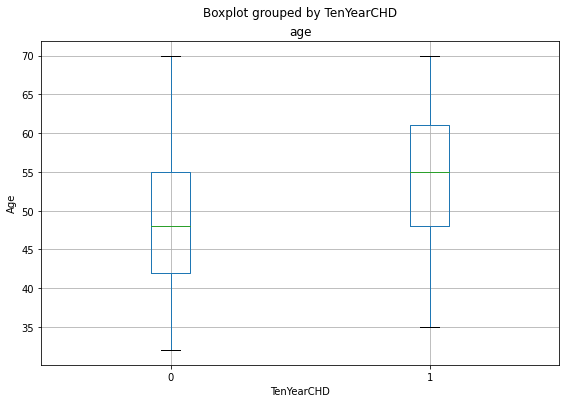

In [79]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'age', by = 'TenYearCHD', ax = ax)
ax.set_ylabel("Age")
plt.show()

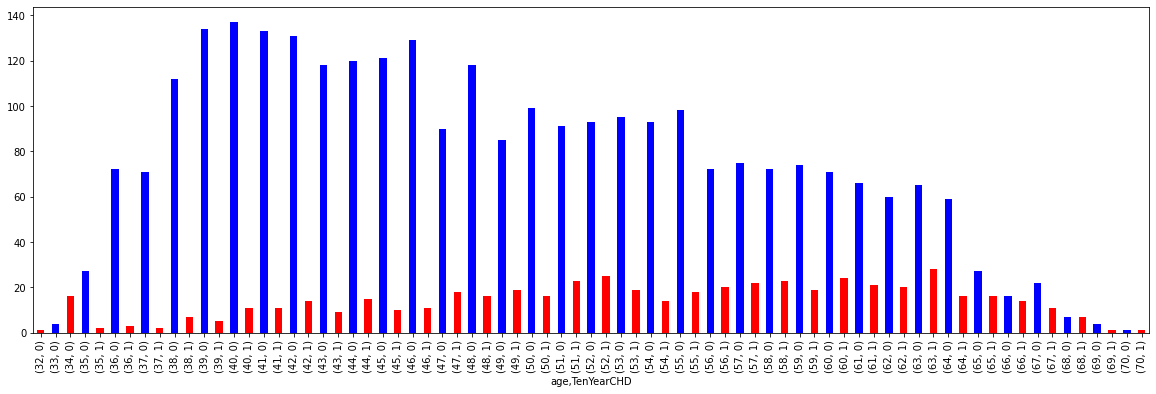

In [80]:
fig = plt.figure(figsize=(20, 6))
df.groupby(['age','TenYearCHD'])['id'].count().plot(kind='bar',color=['red','blue'])

In [81]:
# fig, ax = plt.subplots(figsize=(20,6))
# age_dis=pd.DataFrame(df.groupby(['age','TenYearCHD'])['id'].count())
# sns.barplot(x=age_dis.index,y=age_dis['id'])
# plt.ylabel('Counts')

In [82]:
df['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

In [83]:
df.groupby(['education'])['id'].count()

education
1.0    1391
2.0     990
3.0     549
4.0     373
Name: id, dtype: int64

Text(0.5, 1.0, 'Education Proposanate')

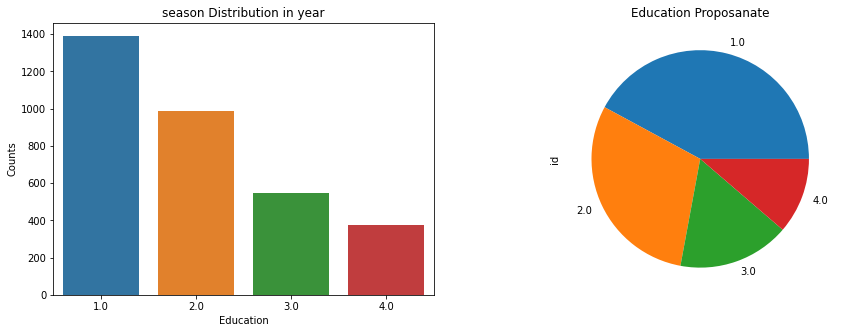

In [84]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['education'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('Education')
plt.ylabel('Counts')
plt.title('season Distribution in year')
ax2=plt.subplot(1,2,2)
df.groupby(['education'])['id'].count().plot(kind='pie')
plt.title('Education Proposanate')

In [85]:
# a=pd.DataFrame(df.groupby(['education','TenYearCHD'])['id'].count())
# sns.barplot(x=a.index,y=a['id'])

In [86]:
df.groupby(['education','TenYearCHD'])['id'].count()

education  TenYearCHD
1.0        0             1135
           1              256
2.0        0              872
           1              118
3.0        0              479
           1               70
4.0        0              319
           1               54
Name: id, dtype: int64

In [87]:
a=df[df['education'].isnull()]

In [88]:
a.groupby(['TenYearCHD'])['id'].count()

TenYearCHD
0    74
1    13
Name: id, dtype: int64

In [89]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 49 to 3331
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               87 non-null     int64  
 1   age              87 non-null     int64  
 2   education        0 non-null      float64
 3   sex              87 non-null     object 
 4   is_smoking       87 non-null     object 
 5   cigsPerDay       85 non-null     float64
 6   BPMeds           87 non-null     float64
 7   prevalentStroke  87 non-null     int64  
 8   prevalentHyp     87 non-null     int64  
 9   diabetes         87 non-null     int64  
 10  totChol          86 non-null     float64
 11  sysBP            87 non-null     float64
 12  diaBP            87 non-null     float64
 13  BMI              86 non-null     float64
 14  heartRate        87 non-null     float64
 15  glucose          81 non-null     float64
 16  TenYearCHD       87 non-null     int64  
dtypes: float64(9), 